- La présentation et les commentaires compteront pour une partie importante de la note.
- Nous nous attendons à ce que vous soyez capables d'étudier des données en utilisant les méthodes vues en TP.  
- Vous avez droit à toutes les ressources sur cette plateforme ou en ligne.   
- Pensez à bien enregistrer puis __télécharger__ très régulièrement votre notebook, au cas où la plateforme vous déconnecte.

## Enoncé

### Partie 1: _(15 points)_

L'ensemble de données contient des mesures sur la composition de 10 marques de pizza. Les variables de l'ensemble de données sont:

* brand - Marque de pizza 
* id - Échantillon analysé
* mois - Quantité d'eau pour 100 grammes dans l'échantillon
* prot - Quantité de protéines pour 100 grammes dans l'échantillon
* fat - Quantité de matières grasses pour 100 grammes dans l'échantillon
* ash - Quantité de cendres pour 100 grammes dans l'échantillon
* sodium - Quantité de sodium pour 100 grammes dans l'échantillon
* carb - Quantité de glucides pour 100 grammes dans l'échantillon
* cal - Quantité de calories pour 100 grammes dans l'échantillon


__1. Extraire les colonnes correspondant aux mesures ainsi que la variable catégorielle.__

__2. Effectuer une ACP de ces données. Que suggèrent les metriques par rappport au nombre de composantes à retenir ?__

__3. En premier lieu, on prendra les deux premières composantes principales et on soignera les représentations graphiques. Le modèle est t-il représentatif?__

__4. Effectuer une CAH pour afficher le dendogramme.__

__5. Comparer avec une méthode K-means.__

__6. Peut-on dire que la classification est bonne comparée au numéro de marque de pizza donné? (En d'autres termes, vérifier si les pizza appartenant à la même marque sont regroupées dans une même classe).__

__7. Est-il judicieux d'exclure un groupe et de refaire une ACP? Justifier et l'effectuer si besoin.__

_Remarque: pour la classification, nous ne cherchons pas à retrouver autant de classes que le nombre de marques de pizza donné._

### Partie 2: _(5 points)_

Cet ensemble de données provient de l'Institut national du diabète et des maladies digestives et rénales indiens. L'objectif de l'ensemble de données est de prédire de manière diagnostique si un patient est prédisposé au diabète ou non, sur la base de certaines mesures diagnostiques incluses dans l'ensemble de données. Plusieurs contraintes ont été imposées à la sélection de ces cas à partir d'une base de données plus importante. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne.

L'ensemble de données se composent de plusieurs variables prédictives médicales et d'une variable cible, le résultat. L'ensemble des variables est décrit comme suit:

* NBG - Nombre de grossesses

* GC - Concentration de glucose plasmatique 

* TD - Tension artérielle diastolique

* EPC - Épaisseur de pli cutané tricipitale

* IS - Insuline sérique  
 
* IMC - Indice de masse corporelle

* DG - La fonction de l'arbre généalogique du diabète (une fonction qui évalue la probabilité de diabète sur la base des antécédents familiaux)

* AGE - L'age

* RESULTAT - La variable de classe (1 si l'individu est prédisposé au diabète, 0 sinon)


__1. Créer un réseau de neurones permettant de prédire si une patiente est prédisposée au diabète ou non. En premier lieu suggérer le votre, puis utiliser le modèle proposé et comparer.__

__2. Evaluer votre modèle ainsi que modèle proposé sur les données test. Commenter.__


__Indication:__

_Commencer par extraire un jeu de test au préalable représentant 20% de la taille de la base de données:_

 x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)


# Partie 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numpy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from pandas.plotting import scatter_matrix

In [5]:
data1 = pd.read_csv('Pizza.csv')
data1.head(2)

brand     id   mois   prot    fat   ash  sodium  carb   cal
0     A  14069  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1     A  14053  28.49  21.26  43.89  5.34    1.79  1.02  4.84

## Question 1

In [6]:
# On stock dans une variable les données quantitatives
var = data1.iloc[:,2:9]
var.head(3)

mois   prot    fat   ash  sodium  carb   cal
0  27.82  21.43  44.87  5.11    1.77  0.77  4.93
1  28.49  21.26  43.89  5.34    1.79  1.02  4.84
2  28.35  19.99  45.78  5.08    1.63  0.80  4.95

In [7]:
# On stock dans une variable les données categorielles
categorielles = data1.iloc[:,0:1]
categorielles.head(2)

brand
0     A
1     A

In [8]:
# On centre et on réduit les valeurs/données quantitatives
x = var.values
x = StandardScaler().fit_transform(x)
x

array([[-1.37181459,  1.25418127,  2.74984143, ...,  2.97668662,
        -1.22751105,  2.68012924],
       [-1.30156227,  1.22771661,  2.64047481, ...,  3.03077869,
        -1.21362189,  2.53473344],
       [-1.31624186,  1.03000998,  2.85139615, ...,  2.59804213,
        -1.22584435,  2.71243942],
       ...,
       [ 0.3823963 , -0.36794707, -0.46866201, ..., -0.07951534,
         0.1730719 , -0.56704362],
       [ 0.70220164, -0.45823828, -0.56352082, ..., -0.29588362,
         0.08918137, -0.82552504],
       [ 0.62251244, -0.53918903, -0.52780927, ..., -0.26883759,
         0.14529358, -0.7447496 ]])

## Question 2

In [9]:
# Instanciation pour l'ACP
acp = sklearnPCA(svd_solver='full')
coord = acp.fit_transform(x)

# Nombres de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

7


In [10]:
# Valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(x)-1)/len(x) #ajustement suite à la version 0.2
print(eigval)

[4.17178190e+00 2.29045739e+00 4.14562342e-01 9.51742273e-02
 2.76770181e-02 3.37609355e-04 9.51878034e-06]


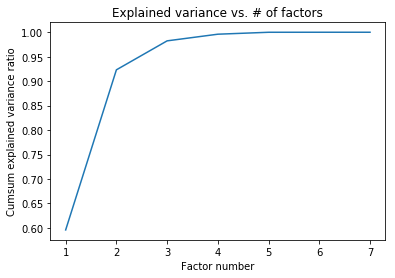

In [11]:
# Cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

En utilisant le critère du coude on retient les deux premières composantes


# Question 3

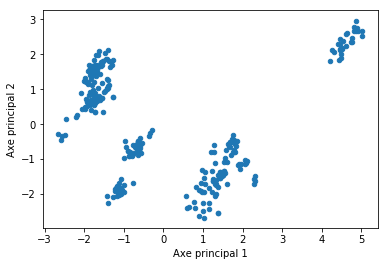

In [12]:
# On effectue une ACP sur ces valeurs
pca = sklearnPCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
finaldf = pd.concat([principaldf, data1.iloc[:,0:1]], axis = 1)
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [13]:
# Nombre de marque de pizza unique pour savoir le nombre de couleurs a mettre
data1.brand.unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

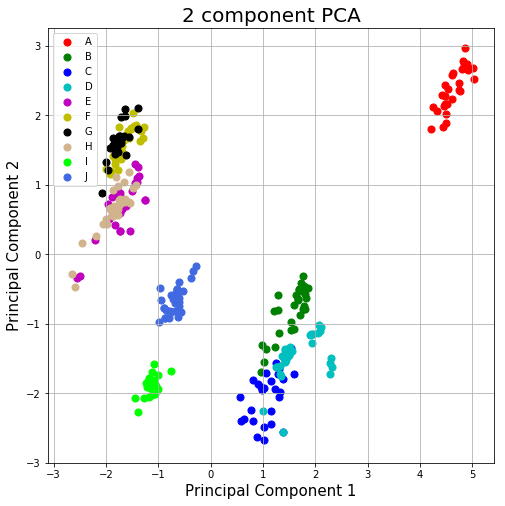

In [14]:
# Visualisation de la répartition de chaque pizza en fonction des composantes 1 et 2 avec des couleurs pour les chaque marque
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'tan', 'lime', 'royalblue']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['brand'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [15]:
# Contribution des individus dans l'inertie totale
di = np.sum(x**2,axis=1)

# Qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data1.id,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

        id    COS2_1    COS2_2
0    14069  0.775166  0.221654
1    14053  0.793240  0.201070
2    14025  0.763141  0.236246
3    14016  0.791285  0.206819
4    14005  0.807292  0.188198
5    14075  0.809216  0.187422
6    14082  0.812318  0.184578
7    14097  0.794864  0.194423
8    14117  0.765258  0.233433
9    14133  0.773565  0.226193
10   14101  0.756748  0.241828
11   14108  0.760368  0.239033
12   14164  0.760472  0.237973
13   14154  0.784961  0.210871
14   24005  0.812924  0.185352
15   24026  0.776918  0.209289
16   24094  0.841775  0.142414
17   24108  0.828656  0.152307
18   24102  0.842563  0.148214
19   24082  0.801259  0.188545
20   34017  0.726831  0.271077
21   34020  0.748778  0.250015
22   24136  0.812044  0.185997
23   24122  0.795698  0.198451
24   24115  0.816775  0.165006
25   34012  0.782608  0.214938
26   34006  0.757397  0.240218
27   24146  0.768395  0.227940
28   24138  0.800002  0.197615
29   14015  0.711744  0.048507
..     ...       ...       ...
270  140

On voit avec les cos^2 que les individus sontplutôt biens représentés

In [16]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((7,7))
for k in range(7):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 1.32168508e-01 -9.50848850e-01 -2.71497942e-01 -6.80933161e-02
  -1.07642463e-03  8.20313706e-03  1.29139098e-03]
 [ 7.73616888e-01 -4.08180979e-01  4.80341077e-01 -3.26803560e-03
  -6.45464124e-02 -3.15153954e-06  8.53888687e-04]
 [ 9.12312469e-01  3.54715333e-01 -1.28327937e-01 -1.56424131e-01
   2.88421527e-02 -9.65383064e-03  1.16521186e-03]
 [ 9.63831544e-01 -1.67975751e-01  3.62320221e-02  1.70416723e-01
   1.11611305e-01  1.08151947e-03  1.72840141e-04]
 [ 8.89920550e-01  3.05199930e-01 -2.93067379e-01  1.37677851e-01
  -1.00253357e-01  5.75291885e-05 -1.61767114e-06]
 [-8.67883723e-01  4.84768536e-01  3.36332661e-02  1.03144801e-01
   1.23723308e-03 -9.34975052e-06  2.39436513e-03]
 [ 4.99363860e-01  8.58804861e-01  7.29599592e-02 -8.61535778e-02
   1.29769290e-02  1.32645528e-02  3.72075533e-05]]


Les corrélations entre variables et facteurs sont proches de 0, ce qui démontre une bonne représentation

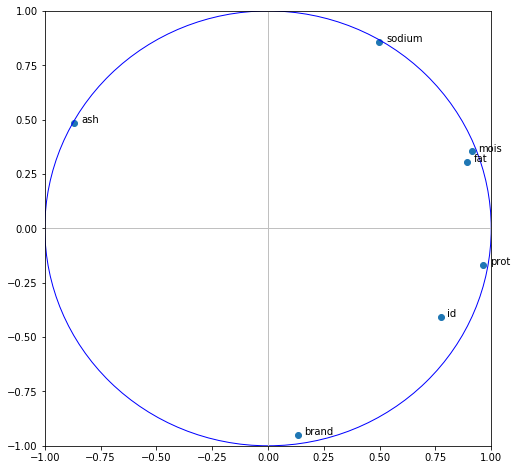

In [17]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(7):
     plt.annotate(data1.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

Les variables sont proches du cercle, donc elles sont biens représentés.

## Question 4

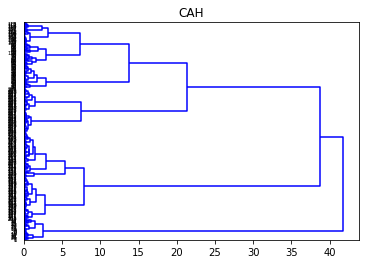

In [18]:
# On génère la matrice des liens
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(x,method='ward',metric='euclidean')

# On affiche le dendrogramme
plt.title("CAH")
dendrogram(Z,orientation='right',color_threshold=0)
plt.show()

On distingue 4 classes

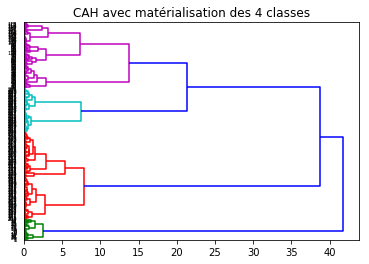

In [19]:
# Matérialisation des 4 classes
plt.title("CAH avec matérialisation des 4 classes")
dendrogram(Z,orientation='right',color_threshold=17)
plt.show()

In [20]:
# On découpe à la hauteur t = 18 ==> identifiants de 4 groupes obtenus
groupes_cah = fcluster(Z,t=18,criterion='distance')
print(groupes_cah)

#index triés des groupes
idg = np.argsort(groupes_cah)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]


## Question 5

In [21]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)  # on choisit 4 avec l'étude du dessus
kmeans.fit(x)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(x),index = data1.id)
print(dist_data)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
              0         1         2         3
id                                           
14069  7.119684  0.532855  6.942621  5.455676
14053  7.048537  0.517307  6.930667  5.364695
14025  6.942152  0.432470  6.736191  5.307404
14016  6.444723  0.234600  6.331090  4.803225
14005  6.392697  0.361064  6.313784  4.712674
14075  6.406929  0.256101  6.349777  4.745471
14082  6.205018  0.494

## Question 6

In [22]:
#correspondance avec les groupes de la CAH
pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0   1    2   3
row_0                 
1       0  29    0   0
2       0   0  120   0
3      61   0    0   0
4       0   0    0  90

On observe que la CAH et le kmeans sont en accord sur tout les resultats

In [24]:
# Correspondance avec le regroupement des brands et celui de la CAH
pd.crosstab(data1.brand,kmeans.labels_)

col_0   0   1   2   3
brand                
A       0  29   0   0
B       0   0   0  31
C       0   0   0  27
D       0   0   0  32
E       0   0  28   0
F       0   0  30   0
G       0   0  29   0
H       0   0  33   0
I      29   0   0   0
J      32   0   0   0

Chaque marque voit ses pizzas classées dans le meme groupe : on en conclue que les pizzas appartenant à la même marque sont regroupées dans une même classe

## Question 7

On pourrait refaire une ACP sans la marque A car ses variables sont éloignés des autres comme on pouvait le voir sur le nuage de points et rendent flou l'analyse des autres marques.

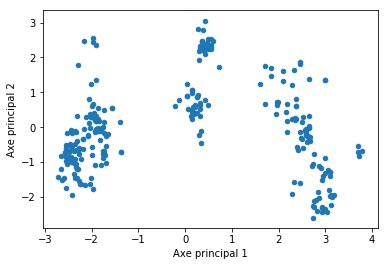

In [25]:
# On enleve la marque A
data2 = data1[data1.brand != 'A']

# On stock dans une variables les données quantitatives
var = data2.iloc[:,2:9]

# On stock dans une variables les données categorielles
categorielles = data2.iloc[:,0:1]
categorielles.head(2)

# On centre et réduit les valeurs quantitatives
x = var.values
x = StandardScaler().fit_transform(x)
x

# On effectue une ACP sur ces valeurs
pca = sklearnPCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
finaldf = pd.concat([principaldf, data1.iloc[:,0:1]], axis = 1)
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

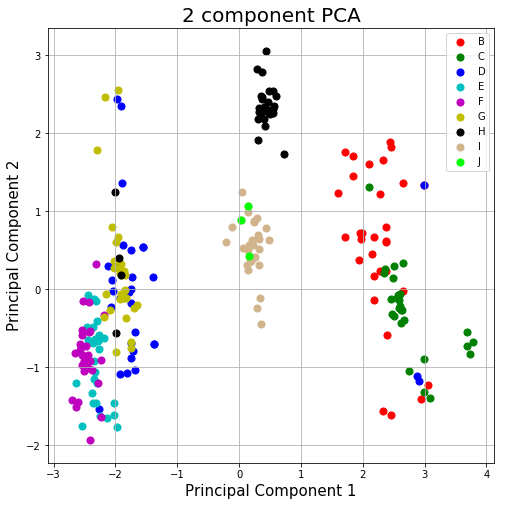

In [27]:
# Visualisation de la répartition de chaque pizza en fonction des composantes 1 et 2 avec des couleurs pour les chaque marque
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'tan', 'lime']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['brand'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

On voit que il n'y a plus de valeurs trop éloignés des autres

# Partie 2

In [83]:
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split

#La fonction pour récupérer l'indice du maximum d'une liste
def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

In [84]:
data2 = pd.read_excel('dataset.xlsx')
data2.head(3)

NBG   GC  TD  EPC  IS   IMC     DG  AGE  RESULTAT
0    6  148  72   35   0  33.6  0.627   50         1
1    1   85  66   29   0  26.6  0.351   31         0
2    8  183  64    0   0  23.3  0.672   32         1

In [78]:
# Création du modèle
model = tf.keras.models.Sequential()

In [79]:
# On ajoute les couches
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))  # softmax va automatiquement faire le lien entre l'indice du max et le labels

In [74]:
# Exemple de prédiction sans entraînement
model_output = model.predict(np.array(data2[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", data2.RESULTAT[0])

[[0.8228401  0.17150645 0.00565348]]
Found :  0
Should be :  1


In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  50        
_________________________________________________________________
dense_13 (Dense)             multiple                  18        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Compile the model
model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)

In [67]:
# On entraine les données
history = model.fit(data2, data2.RESULTAT, epochs=10, validation_split=0.2)

Train on 614 samples, validate on 154 samples
Epoch 1/10
614/614 [==============================] - 0s 553us/sample - loss: 4.7076 - acc: 0.5521 - val_loss: 4.2386 - val_acc: 0.5476
Epoch 2/10
614/614 [==============================] - 0s 133us/sample - loss: 3.6386 - acc: 0.5543 - val_loss: 3.2091 - val_acc: 0.5519
Epoch 3/10
614/614 [==============================] - 0s 170us/sample - loss: 2.8907 - acc: 0.5592 - val_loss: 2.5026 - val_acc: 0.5584
Epoch 4/10
614/614 [==============================] - 0s 278us/sample - loss: 2.3664 - acc: 0.5679 - val_loss: 1.9726 - val_acc: 0.5736
Epoch 5/10
614/614 [==============================] - 0s 172us/sample - loss: 1.9706 - acc: 0.5825 - val_loss: 1.5997 - val_acc: 0.5779
Epoch 6/10
614/614 [==============================] - 0s 169us/sample - loss: 1.6253 - acc: 0.6010 - val_loss: 1.3064 - val_acc: 0.5844
Epoch 7/10
614/614 [==============================] - 0s 169us/sample - loss: 1.3081 - acc: 0.6151 - val_loss: 1.0703 - val_acc: 0.5931
Ep

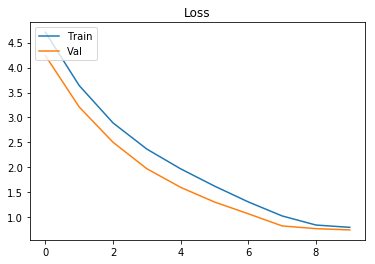

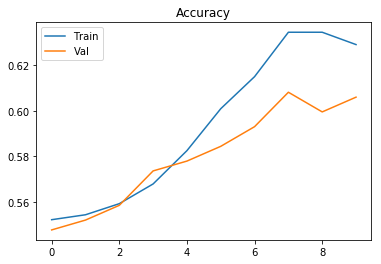

In [68]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [69]:
loss, acc = model.evaluate(data2, data2.RESULTAT)
print("Test Loss", loss)
print("Test Accuracy", acc)

768/768 [==============================] - 0s 24us/sample - loss: 0.7753 - acc: 0.6306
Test Loss 0.7752513388792673
Test Accuracy 0.63064235


### Utiliser ce modèle et comparer

In [94]:
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split

#La fonction pour récupérer l'indice du maximum d'une liste
def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

In [95]:
data2 = pd.read_excel('dataset.xlsx')
data2.head(3)

NBG   GC  TD  EPC  IS   IMC     DG  AGE  RESULTAT
0    6  148  72   35   0  33.6  0.627   50         1
1    1   85  66   29   0  26.6  0.351   31         0
2    8  183  64    0   0  23.3  0.672   32         1

In [98]:
# model creation
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(12, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    loss="binary_crossentropy",      
    optimizer="adam",                            
    metrics=["accuracy"]                           
)

In [99]:
# On entraine les données
history = model.fit(data2, data2.RESULTAT, epochs=10, validation_split=0.2)

ValueError: Please provide as model inputs either a single array or a list of arrays. You passed: x=     NBG   GC  TD  EPC   IS   IMC     DG  AGE  RESULTAT
0      6  148  72   35    0  33.6  0.627   50         1
1      1   85  66   29    0  26.6  0.351   31         0
2      8  183  64    0    0  23.3  0.672   32         1
3      1   89  66   23   94  28.1  0.167   21         0
4      0  137  40   35  168  43.1  2.288   33         1
5      5  116  74    0    0  25.6  0.201   30         0
6      3   78  50   32   88  31.0  0.248   26         1
7     10  115   0    0    0  35.3  0.134   29         0
8      2  197  70   45  543  30.5  0.158   53         1
9      8  125  96    0    0   0.0  0.232   54         1
10     4  110  92    0    0  37.6  0.191   30         0
11    10  168  74    0    0  38.0  0.537   34         1
12    10  139  80    0    0  27.1  1.441   57         0
13     1  189  60   23  846  30.1  0.398   59         1
14     5  166  72   19  175  25.8  0.587   51         1
15     7  100   0    0    0  30.0  0.484   32         1
16     0  118  84   47  230  45.8  0.551   31         1
17     7  107  74    0    0  29.6  0.254   31         1
18     1  103  30   38   83  43.3  0.183   33         0
19     1  115  70   30   96  34.6  0.529   32         1
20     3  126  88   41  235  39.3  0.704   27         0
21     8   99  84    0    0  35.4  0.388   50         0
22     7  196  90    0    0  39.8  0.451   41         1
23     9  119  80   35    0  29.0  0.263   29         1
24    11  143  94   33  146  36.6  0.254   51         1
25    10  125  70   26  115  31.1  0.205   41         1
26     7  147  76    0    0  39.4  0.257   43         1
27     1   97  66   15  140  23.2  0.487   22         0
28    13  145  82   19  110  22.2  0.245   57         0
29     5  117  92    0    0  34.1  0.337   38         0
..   ...  ...  ..  ...  ...   ...    ...  ...       ...
738    2   99  60   17  160  36.6  0.453   21         0
739    1  102  74    0    0  39.5  0.293   42         1
740   11  120  80   37  150  42.3  0.785   48         1
741    3  102  44   20   94  30.8  0.400   26         0
742    1  109  58   18  116  28.5  0.219   22         0
743    9  140  94    0    0  32.7  0.734   45         1
744   13  153  88   37  140  40.6  1.174   39         0
745   12  100  84   33  105  30.0  0.488   46         0
746    1  147  94   41    0  49.3  0.358   27         1
747    1   81  74   41   57  46.3  1.096   32         0
748    3  187  70   22  200  36.4  0.408   36         1
749    6  162  62    0    0  24.3  0.178   50         1
750    4  136  70    0    0  31.2  1.182   22         1
751    1  121  78   39   74  39.0  0.261   28         0
752    3  108  62   24    0  26.0  0.223   25         0
753    0  181  88   44  510  43.3  0.222   26         1
754    8  154  78   32    0  32.4  0.443   45         1
755    1  128  88   39  110  36.5  1.057   37         1
756    7  137  90   41    0  32.0  0.391   39         0
757    0  123  72    0    0  36.3  0.258   52         1
758    1  106  76    0    0  37.5  0.197   26         0
759    6  190  92    0    0  35.5  0.278   66         1
760    2   88  58   26   16  28.4  0.766   22         0
761    9  170  74   31    0  44.0  0.403   43         1
762    9   89  62    0    0  22.5  0.142   33         0
763   10  101  76   48  180  32.9  0.171   63         0
764    2  122  70   27    0  36.8  0.340   27         0
765    5  121  72   23  112  26.2  0.245   30         0
766    1  126  60    0    0  30.1  0.349   47         1
767    1   93  70   31    0  30.4  0.315   23         0

[768 rows x 9 columns]

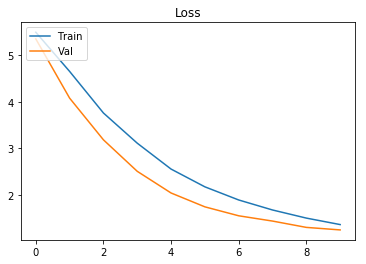

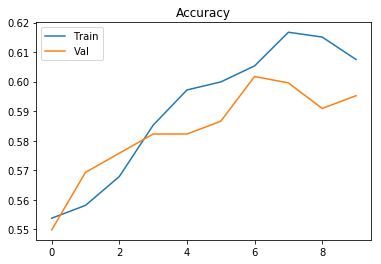

In [49]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()